In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [59]:
MY_API_KEY = "0GyN2A4C0TsdKRN_MM0KoSf-mzy5GyJTHVDI0sGlhvuGHRHGlj6tp70l3F-qfyzyM3eKFG9s2fnW5a3Zf9Lxjo4wYL0NaahGkquKWanmMNaxdPCUr-_eob5z65-hX3Yx"


term = 'Bakeries'
location = 'Bronx'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

#opional parameter in get reqest that allows us to use our api key
headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [60]:
response.status_code

200

In [61]:
print(response)

<Response [200]>


In [62]:
response.text

'{"businesses": [{"id": "b9RW2YCriwuiC5x2Bs-E_Q", "alias": "madonia-brothers-bakery-bronx", "name": "Madonia Brothers Bakery", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/xZ74D2ReukvMdIPMQyth7A/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/madonia-brothers-bakery-bronx?adjust_creative=pn1anYS2nL_8xD8KiFJOiA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=pn1anYS2nL_8xD8KiFJOiA", "review_count": 266, "categories": [{"alias": "bakeries", "title": "Bakeries"}], "rating": 4.5, "coordinates": {"latitude": 40.85438, "longitude": -73.8884099}, "transactions": [], "price": "$", "location": {"address1": "2348 Arthur Ave", "address2": "", "address3": "", "city": "Bronx", "zip_code": "10458", "country": "US", "state": "NY", "display_address": ["2348 Arthur Ave", "Bronx, NY 10458"]}, "phone": "+17182955573", "display_phone": "(718) 295-5573", "distance": 1437.4485410002578}, {"id": "IKkot7qjdVw2tlSJi-LLrQ", "alias": "contis-pastry-shoppe-bronx", "name

In [63]:
json.loads(response.text)

{'businesses': [{'id': 'b9RW2YCriwuiC5x2Bs-E_Q',
   'alias': 'madonia-brothers-bakery-bronx',
   'name': 'Madonia Brothers Bakery',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/xZ74D2ReukvMdIPMQyth7A/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/madonia-brothers-bakery-bronx?adjust_creative=pn1anYS2nL_8xD8KiFJOiA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=pn1anYS2nL_8xD8KiFJOiA',
   'review_count': 266,
   'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.85438, 'longitude': -73.8884099},
   'transactions': [],
   'price': '$',
   'location': {'address1': '2348 Arthur Ave',
    'address2': '',
    'address3': '',
    'city': 'Bronx',
    'zip_code': '10458',
    'country': 'US',
    'state': 'NY',
    'display_address': ['2348 Arthur Ave', 'Bronx, NY 10458']},
   'phone': '+17182955573',
   'display_phone': '(718) 295-5573',
   'distance': 1437.4485410002578},
  {'i

In [64]:
# working with JSON

bakeries = response.text
bakeries = json.loads(bakeries)

In [65]:
type(bakeries)

dict

In [66]:
# cleaning and exploring the data
for key in bakeries.keys():
    print(key)

businesses
total
region


In [67]:
bakeries['businesses'][0]

{'id': 'b9RW2YCriwuiC5x2Bs-E_Q',
 'alias': 'madonia-brothers-bakery-bronx',
 'name': 'Madonia Brothers Bakery',
 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/xZ74D2ReukvMdIPMQyth7A/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/madonia-brothers-bakery-bronx?adjust_creative=pn1anYS2nL_8xD8KiFJOiA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=pn1anYS2nL_8xD8KiFJOiA',
 'review_count': 266,
 'categories': [{'alias': 'bakeries', 'title': 'Bakeries'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.85438, 'longitude': -73.8884099},
 'transactions': [],
 'price': '$',
 'location': {'address1': '2348 Arthur Ave',
  'address2': '',
  'address3': '',
  'city': 'Bronx',
  'zip_code': '10458',
  'country': 'US',
  'state': 'NY',
  'display_address': ['2348 Arthur Ave', 'Bronx, NY 10458']},
 'phone': '+17182955573',
 'display_phone': '(718) 295-5573',
 'distance': 1437.4485410002578}

In [68]:
bakeries['region']

{'center': {'longitude': -73.87138366699219, 'latitude': 40.85220853481013}}

In [69]:
# explore which objects in the dataframe we need
import pandas as pd
bakeries_df = pd.DataFrame(bakeries['businesses'])

bakeries_df.head()


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,b9RW2YCriwuiC5x2Bs-E_Q,madonia-brothers-bakery-bronx,Madonia Brothers Bakery,https://s3-media3.fl.yelpcdn.com/bphoto/xZ74D2...,False,https://www.yelp.com/biz/madonia-brothers-bake...,266,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,"{'latitude': 40.85438, 'longitude': -73.8884099}",[],$,"{'address1': '2348 Arthur Ave', 'address2': ''...",+17182955573,(718) 295-5573,1437.448541
1,IKkot7qjdVw2tlSJi-LLrQ,contis-pastry-shoppe-bronx,Conti's Pastry Shoppe,https://s3-media3.fl.yelpcdn.com/bphoto/6WmIdx...,False,https://www.yelp.com/biz/contis-pastry-shoppe-...,241,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.0,"{'latitude': 40.845635, 'longitude': -73.862791}",[],$$,"{'address1': '786 Morris Park Ave', 'address2'...",+17182399339,(718) 239-9339,1025.648619
2,vGFCPgKmDqsldeA7qadZbw,terranova-bakery-bronx,Terranova Bakery,https://s3-media1.fl.yelpcdn.com/bphoto/atuNwg...,False,https://www.yelp.com/biz/terranova-bakery-bron...,44,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,"{'latitude': 40.8544, 'longitude': -73.88481}",[],$$,"{'address1': '691 E 187th St', 'address2': '',...",+17183676985,(718) 367-6985,1154.745342
3,VJp6W2UZR9HKRbPrY2ZCZw,zeppieri-and-sons-bakery-bronx,Zeppieri & Sons Bakery,https://s3-media3.fl.yelpcdn.com/bphoto/cbGPAD...,False,https://www.yelp.com/biz/zeppieri-and-sons-bak...,88,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.0,"{'latitude': 40.84692, 'longitude': -73.83177}",[],$,"{'address1': '3004 Buhre Ave', 'address2': '',...",+17188299111,(718) 829-9111,3375.348046
4,rqr8waPF6HoIm5MurDziLA,sal-and-doms-pastry-shop-bronx,Sal & Dom's Pastry Shop,https://s3-media1.fl.yelpcdn.com/bphoto/5H0is3...,False,https://www.yelp.com/biz/sal-and-doms-pastry-s...,94,"[{'alias': 'bakeries', 'title': 'Bakeries'}]",4.5,"{'latitude': 40.865162, 'longitude': -73.855157}",[],$$,"{'address1': '1108 Allerton Ave', 'address2': ...",+17185153344,(718) 515-3344,1985.172565


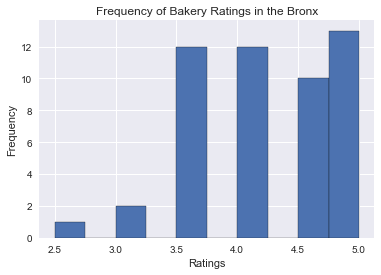

In [70]:
# you can do some analysis and visualization from here on! 

plt.hist(bakeries_df['rating'],bins =  edgecolor='black')
# "plt.hist(axethrowing_df['review_count']);\n",

plt.title('Frequency of Bakery Ratings in the Bronx')
# visualize the review count - what's the appropriate plot?
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

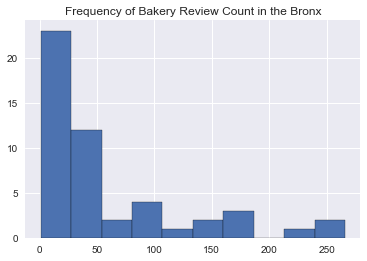

In [71]:
plt.hist(bakeries_df['review_count'], edgecolor='black')
# "plt.hist(axethrowing_df['review_count']);\n",

plt.title('Frequency of Bakery Review Count in the Bronx')
# visualize the review count - what's the appropriate plot?
plt.show()